In [2]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)
from word2vec.model import NGramLanguageModeler, NeuralNonlinearClassifier

In [3]:
import networkx as nx
import numpy as np

In [ ]:
gf = nx.karate_club_graph()

In [ ]:
import random
WALK_LENGTH = 2
WALK_NUMBER_PER_NODE = 20
walks = []
for node in gf.nodes():
    for i in range(WALK_NUMBER_PER_NODE):
        walk=[]
        curr = node
        for j in range(WALK_LENGTH):
            curr = random.choice(list(gf.adj[curr].keys()))
            walk.append(curr)
        walks.append((walk, node))



In [ ]:
len(walks)

680

In [ ]:
walks[:5]

[([19, 33], 0), ([21, 1], 0), ([2, 32], 0), ([3, 7], 0), ([5, 6], 0)]

In [ ]:
vocab = list(gf.nodes())
vocab[:5]

[0, 1, 2, 3, 4]

In [ ]:
EMBEDDING_DIM = 10
CONTEXT_SIZE = WALK_LENGTH
losses = []
losses2=[]
loss_function = nn.NLLLoss()
loss_function2 = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
model2 = NeuralNonlinearClassifier(EMBEDDING_DIM, n_classes=2)
model.to(0)
model2.to(0)
optimizer1 = optim.Adam(model.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
node_labels = torch.tensor(y, dtype=torch.long).to(0)

In [ ]:

for epoch in range(100):
    total_loss = 0
    for context, target in walks:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([w for w in context], dtype=torch.long).to(0)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([target], dtype=torch.long).to(0))
        loss.backward()
        optimizer1.step()


        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)


    embeds_predi = model.embeddings.weight
    model2.zero_grad()
    probs = model2(embeds_predi)
    loss2 = loss_function2(probs, node_labels)
    loss2.backward()
    optimizer2.step()
    losses2.append(loss2)
    # plt.clf()
    # plt.plot(losses)
# print(losses)  # The loss decreased every iteration over the training data!

# To get the embedding of a particular word, e.g. "beauty"
print(model.embeddings.weight[0])

/pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: cunn_ClassNLLCriterion_updateOutput_kernel: block: [0,0,0], thread: [0,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: cunn_ClassNLLCriterion_updateOutput_kernel: block: [0,0,0], thread: [1,0,0] Assertion `t >= 0 && t < n_classes` failed.
Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 563, in _pydevd_bundle.pydevd_cython.PyDBFrame._handle_exception
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/home/emil/.local/share/virtualenvs/masters--_fQS0pJ/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/home/emil/.local/share/virtualenvs/masters--_fQS0pJ/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py",

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

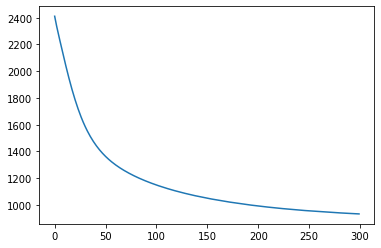

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [ ]:
def similarity(v,u):
  return torch.dot(v,u)/(torch.norm(v)*torch.norm(u))

In [ ]:
similarity(model.embeddings.weight[1], model.embeddings.weight[5])

tensor(-0.4213, device='cuda:0', grad_fn=<DivBackward0>)

In [ ]:
gf.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [ ]:
import numpy as np

array([ True,  True,  True,  True,  True])

In [ ]:
X = model.embeddings.weight.cpu().detach().numpy()

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [ ]:
f1_score(y, lr.predict(X))

0.7647058823529412

In [ ]:
lr.predict(X)[:5]

array([ True,  True,  True, False, False])

In [ ]:
y[:5]

array([ True,  True,  True,  True,  True])

In [ ]:
accuracy_score(y, lr.predict(X))

0.7647058823529411

In [ ]:
confusion_matrix(y, lr.predict(X))

array([[13,  4],
       [ 4, 13]])

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=5)
transformed = tsne.fit_transform(X)
# transformed

/home/emil/.local/share/virtualenvs/masters--_fQS0pJ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/emil/.local/share/virtualenvs/masters--_fQS0pJ/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


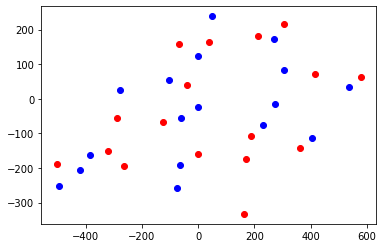

In [ ]:

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(transformed[y==True, 0], transformed[y==True, 1], color='red')
ax.scatter(transformed[y==False, 0], transformed[y==False, 1], color='blue')
plt.show()